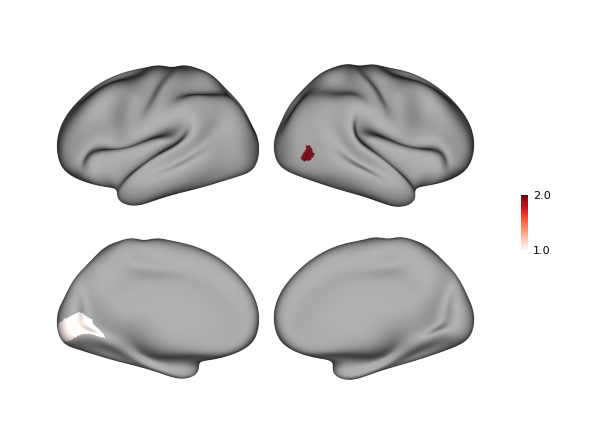

In [3]:
from plotfig import plot_brain_surface_figure
import matplotlib.pyplot as plt

plot_data = {"lh_V1": 1, "rh_MST": 2}

# fig, ax = plt.subplots()

ax = plot_brain_surface_figure(plot_data, cmap="Reds")

<Axes: >

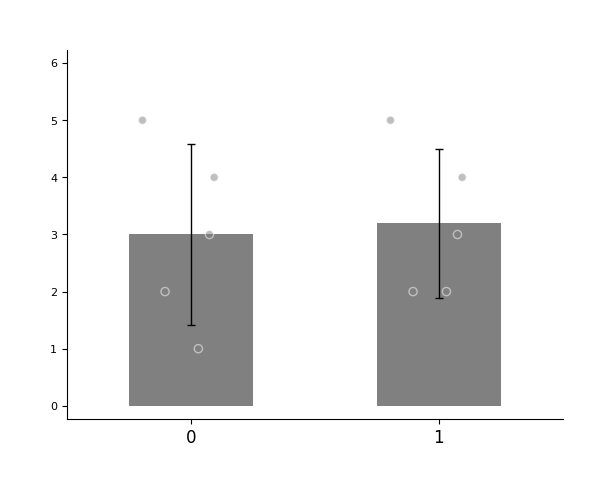

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from plotfig import plot_one_group_bar_figure


a = [1,2,3,4,5]
b = [2,2,3,4,5]

plot_one_group_bar_figure([a, b])